## Arbol elemental con libreria  rpart

Debe tener instaladas las librerias  data.table  ,  rpart   y rpart.plot

In [282]:
#cargo las librerias que necesito
require("data.table")
require("rpart")
require("rpart.plot")

Aqui se debe poner la carpeta de SU computadora local

In [283]:
setwd("/Users/mmarchetta/Desktop/laboratorio1")  #Establezco el Working Directory

cargo el dataset

In [284]:
dataset  <- fread("./datasets/dataset_pequeno.csv")


defino donde entreno y donde aplico el modelo

In [285]:
dtrain  <- dataset[ foto_mes==202107 ]  #defino donde voy a entrenar
dtest  <- dataset[ foto_mes==202109 ]  #defino donde voy a aplicar el modelo

genero el modelo,  aqui se construye el arbol

In [286]:
modelo  <- rpart(formula=    "clase_ternaria ~ .", #quiero predecir clase_ternaria a partir de el resto de las variables
                 data =      dtrain,  #los datos donde voy a entrenar
                 xval=       10000,
                 cp=        -0.5, #esto significa no limitar la complejidad de los splits
                 minsplit= 900,   #minima cantidad de registros para que se haga el split
                 minbucket=  440,   #tamaño minimo de una hoja
                 maxdepth= 5 )  #PRUEBO  una profundidad de 10

Ahora grafico el arbol, va a ser muy frondoso porque la profundidad es de 10

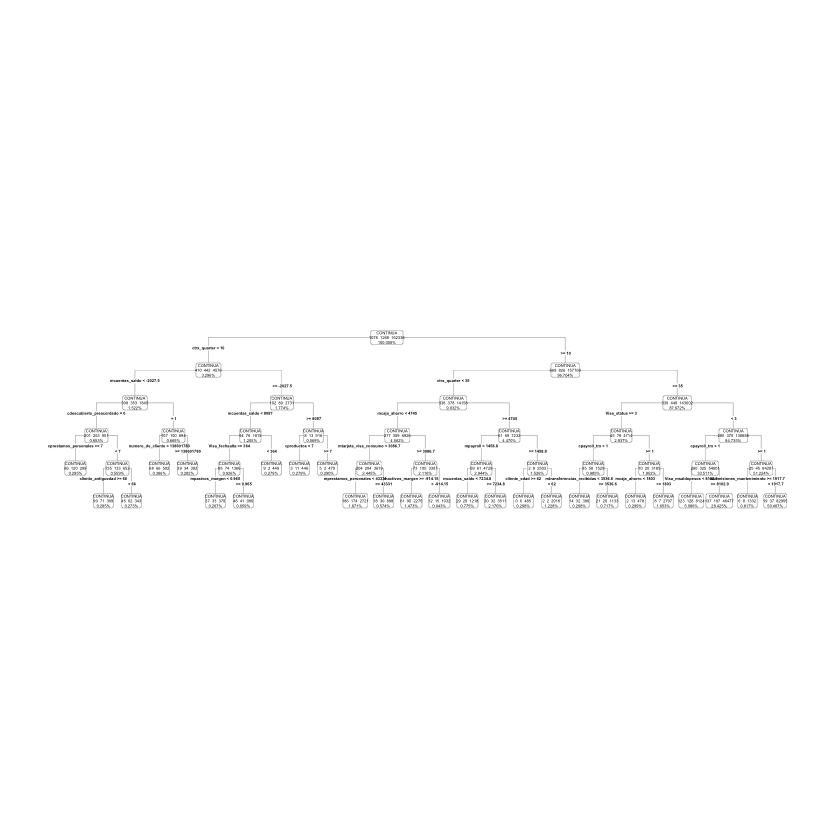

In [287]:
prp(modelo, extra=101, digits=-5, branch=1, type=4, varlen=0, faclen=0)

Ahora aplico al modelo  a los datos muevos  y genero la salida para kaggle

aplico el modelo a los datos nuevos

In [288]:
prediccion  <- predict( modelo, dtest , type = "prob") #aplico el modelo

prediccion es una matriz con TRES columnas, llamadas "BAJA+1", "BAJA+2"  y "CONTINUA"
cada columna es el vector de probabilidades 

agrego a dapply una columna nueva que es la probabilidad de BAJA+2

In [289]:
dtest[ , prob_baja2 := prediccion[, "BAJA+2"] ]

ERROR: Error in `[.default`(prediccion, , "BAJA+2"): incorrect number of dimensions


solo le envio estimulo a los registros con probabilidad de BAJA+2 mayor  a  1/40

In [ ]:
dtest[ , Predicted  := as.numeric(prob_baja2 > 1/40) ]

In [ ]:
ganancia <- dtest[ , sum(  ifelse(prob_baja2>0.025, 1, 0) * ifelse( clase_ternaria=="BAJA+2", 117000, -3000) )]
ganancia

[1] -30792000

Finalmente genero el archivo para Kaggle

creo la carpeta donde va el experimento

In [ ]:
dir.create( "./exp/KA2002" ) 

Warning message in dir.create("./exp/KA2002"):
"'./exp/KA2002' already exists"


grabo el dataset

In [ ]:
fwrite( dtest[ , list(numero_de_cliente, Predicted) ], #solo los campos para Kaggle
        file= "./exp/KA2002/KA2002_004.csv", 
        sep= "," )